In [1]:
import os
import rasterio as rio
import numpy as np
import shapely
from shapely.geometry import Polygon, MultiPolygon, box
import pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import rioxarray as riox
import rasterio as rio
import xarray as xr
import netCDF4
from osgeo import gdal
import pandas as pd
from datetime import datetime
import dask.array
import matplotlib as mpl
from matplotlib.colors import TwoSlopeNorm, LogNorm
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.patches import Patch, Circle
import matplotlib.ticker as mticker
import sklearn
import importlib
import cartopy.crs as ccrs
import cartopy as ctp

import sys
sys.path.append('../')
import snowFun

In [2]:
importlib.reload(snowFun)

<module 'snowFun' from 'C:\\Users\\lzell\\OneDrive - Colostate\\Desktop\\AGVA\\scripts\\Figures\\..\\snowFun\\__init__.py'>

In [11]:
# define folder and file paths
folder_AGVA = os.path.join('C:',os.sep,'Users','lzell','OneDrive - Colostate','Desktop',"AGVA")
folder_plotting = os.path.join(folder_AGVA, 'Plotting')
folder_figures = os.path.join(folder_AGVA, 'Figures', 'training data example')

# open each of the figures we are going to be plotting
xr_snow = riox.open_rasterio(os.path.join(folder_figures, "snow_on.tif"))
xr_raw = riox.open_rasterio(os.path.join(folder_figures, "rgb.tif"))

# calculate normalized image
xr_norm = xr_raw/xr_snow

In [26]:
def format_plot(xr_image, rgb_bands, vmin, vmax, scale):
    red = xr_image[rgb_bands[0]]
    green = xr_image[rgb_bands[1]]
    blue = xr_image[rgb_bands[2]]
    
    rgb_im = np.dstack([red, green, blue])
    rgb_im = ((rgb_im*scale)-vmin)/vmax
    return np.clip(rgb_im, 0, 1)

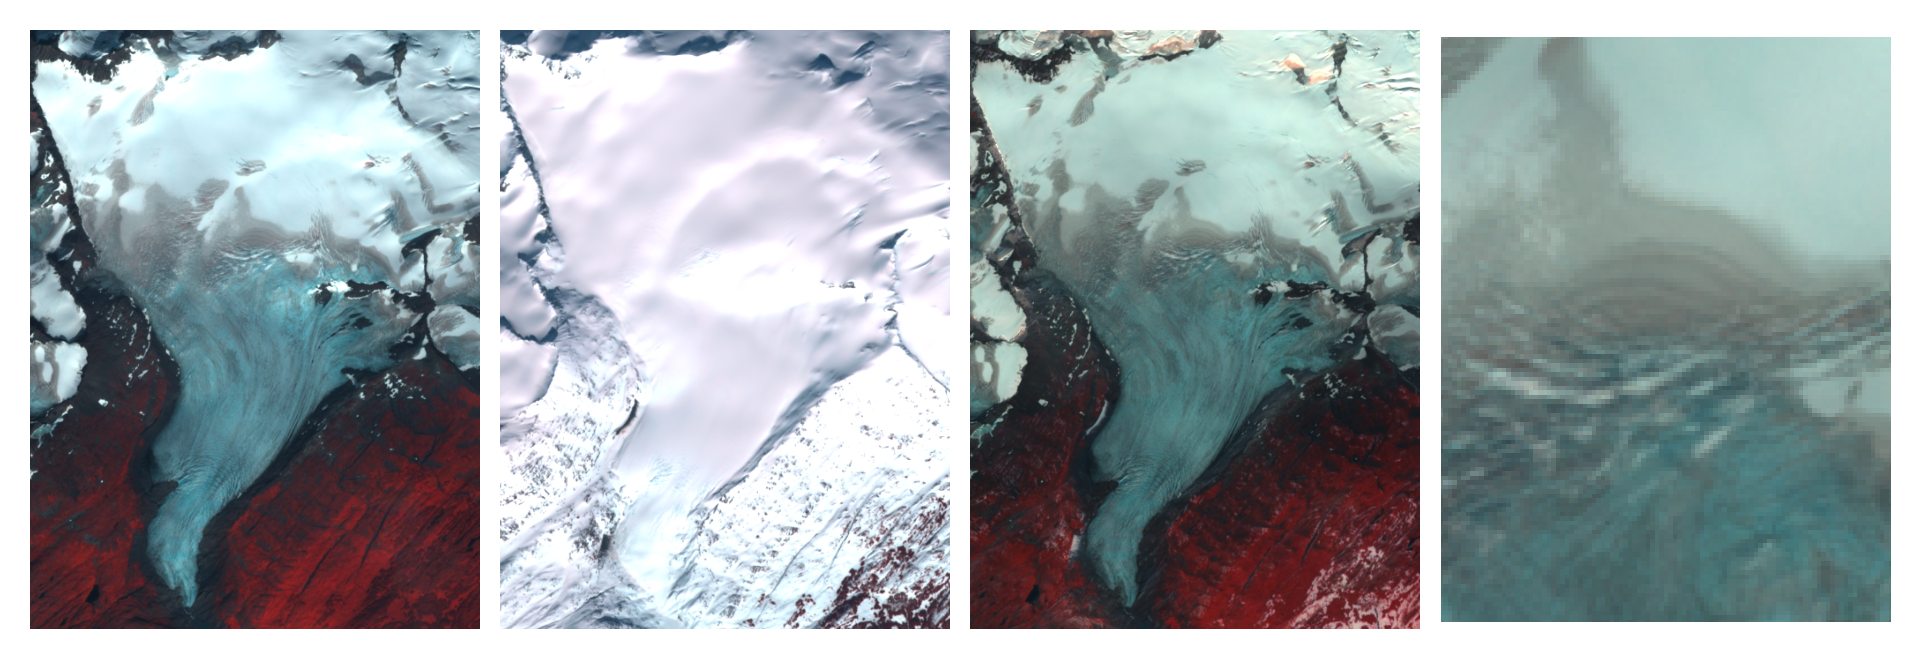

In [94]:
# initiate figure, plot the images
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'

fig,axs = plt.subplots(1,4, figsize=(6.5,2.5), dpi=300)
rgb_plot = format_plot( xr_raw, rgb_bands=[3,1,0], vmin=0, vmax=0.7, scale=0.0001 )
snow_plot = format_plot( xr_snow, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=0.0001 )
norm_plot = format_plot( xr_norm, rgb_bands=[3,1,0], vmin=0, vmax=0.9, scale=1 )

axs[0].imshow( rgb_plot, aspect='equal' )
axs[1].imshow( snow_plot, aspect='equal' )
axs[2].imshow( norm_plot, aspect='equal' )
axs[3].imshow( norm_plot, aspect='equal' )

for ax in axs:
    ax.set_xlim(490,1000)
    ax.set_ylim(1080,400)
#     ax.set_xlim(620,820)
#     ax.set_ylim(800,500)
    ax.set_aspect('equal')
    ax.axis('off')

axs[3].set_xlim(700,800)
axs[3].set_ylim(710,580)

plt.tight_layout(h_pad=0, w_pad=0.5)

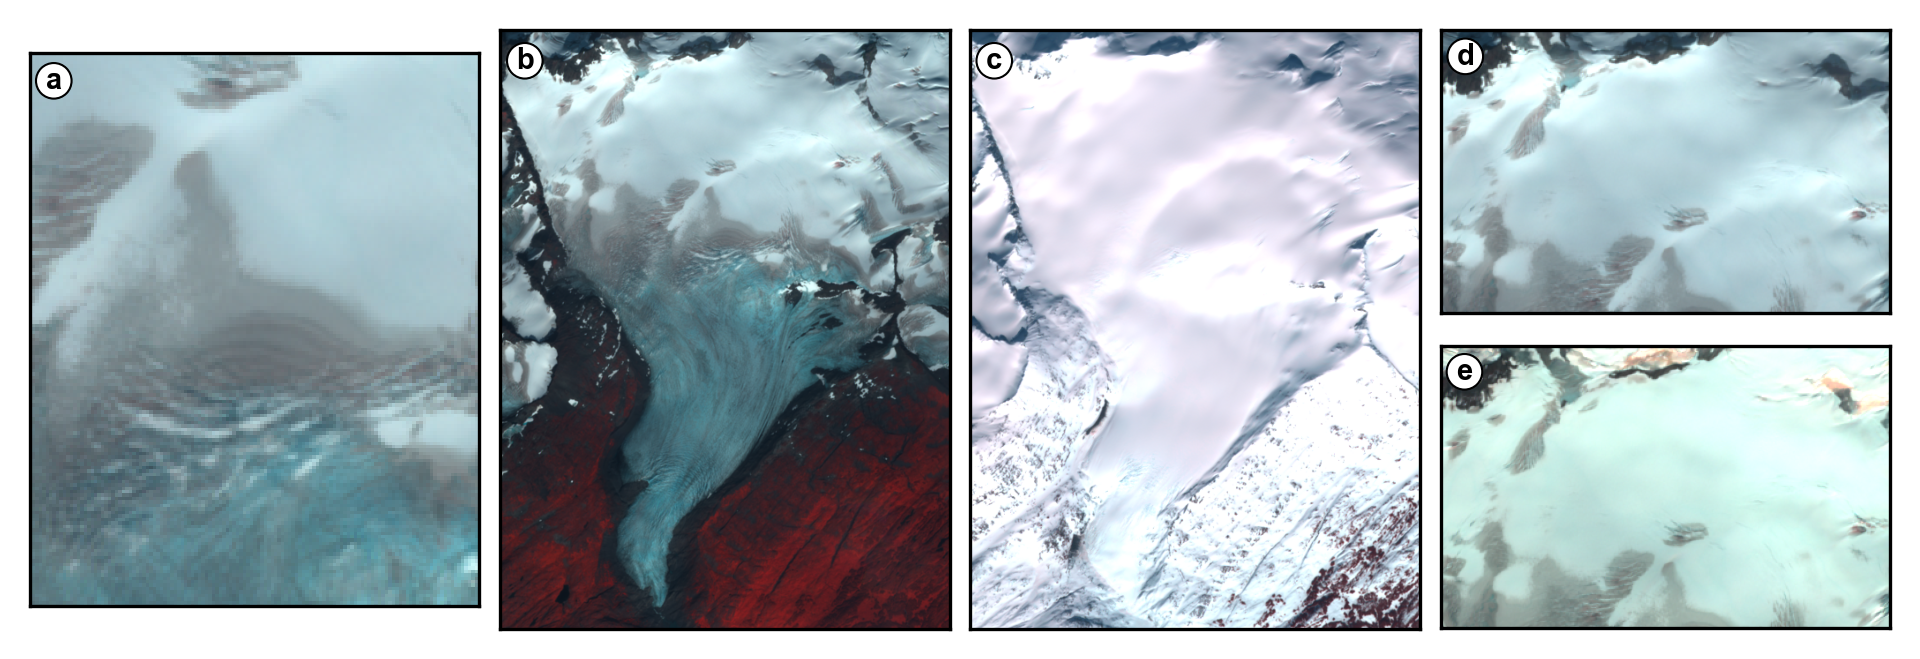

In [204]:
# initiate figure, plot the images
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'

fig,axs = plt.subplots(1,4, figsize=(6.5,2.5), dpi=300)

ax_rgb = axs[1]
ax_snow = axs[2]
ax_double = axs[3]
ax_class = axs[0]

# add two subplots to highlight the effect of snow-on normalization
ax_double.remove()
axa = plt.subplot2grid((2, 4), (0, 3))
axb = plt.subplot2grid((2, 4), (1, 3))

rgb_plot = format_plot( xr_raw, rgb_bands=[3,1,0], vmin=0, vmax=0.8, scale=0.0001 )
snow_plot = format_plot( xr_snow, rgb_bands=[3,1,0], vmin=0, vmax=1, scale=0.0001 )
norm_plot = format_plot( xr_norm, rgb_bands=[3,1,0], vmin=0, vmax=0.8, scale=1 )

ax_rgb.imshow( rgb_plot, aspect='equal' )
ax_snow.imshow( snow_plot, aspect='equal' )
ax_class.imshow( rgb_plot, aspect='equal' )

axa.imshow( rgb_plot, aspect='equal' )
axb.imshow( norm_plot, aspect='equal' )

for ax in axs:
    ax.set_xlim(490,1000)
    ax.set_ylim(1080,400)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.axis('off')

# limits for zoom-in class examples
ax_class.set_xlim(680,810)
ax_class.set_ylim(710,550)

# limits for normalization examples
for ax in [axa,axb]:
#     ax.set_xlim(470,1000)
#     ax.set_ylim(730,400)
    ax.set_xlim(550,900)
    ax.set_ylim(630,410)
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
#     ax.axis('off')

plt.tight_layout(h_pad=-0.7, w_pad=0.5)

# add subplot labels
t0 = axs[0].text(0.035, 0.935, 'a', transform=axs[0].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t1 = axs[1].text(0.035, 0.935, 'b', transform=axs[1].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t2 = axs[2].text(0.035, 0.935, 'c', transform=axs[2].transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t3 = axa.text(   0.035, 0.88, 'd', transform=axa.transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))
t4 = axb.text(   0.035, 0.88, 'e', transform=axb.transAxes, fontsize=7, weight='bold', bbox=dict(facecolor='white', edgecolor='black', linewidth=0.5))

for t in [t0,t1,t2,t3,t4]:
    t.get_bbox_patch().set_boxstyle("circle", pad=0.13)
    
# save
out_path = os.path.join(folder_figures, 'base_example.png')
plt.savefig(out_path, dpi=400, bbox_inches='tight', pad_inches=0.015)

In [39]:
xr_norm.shape

(5, 1408, 1568)

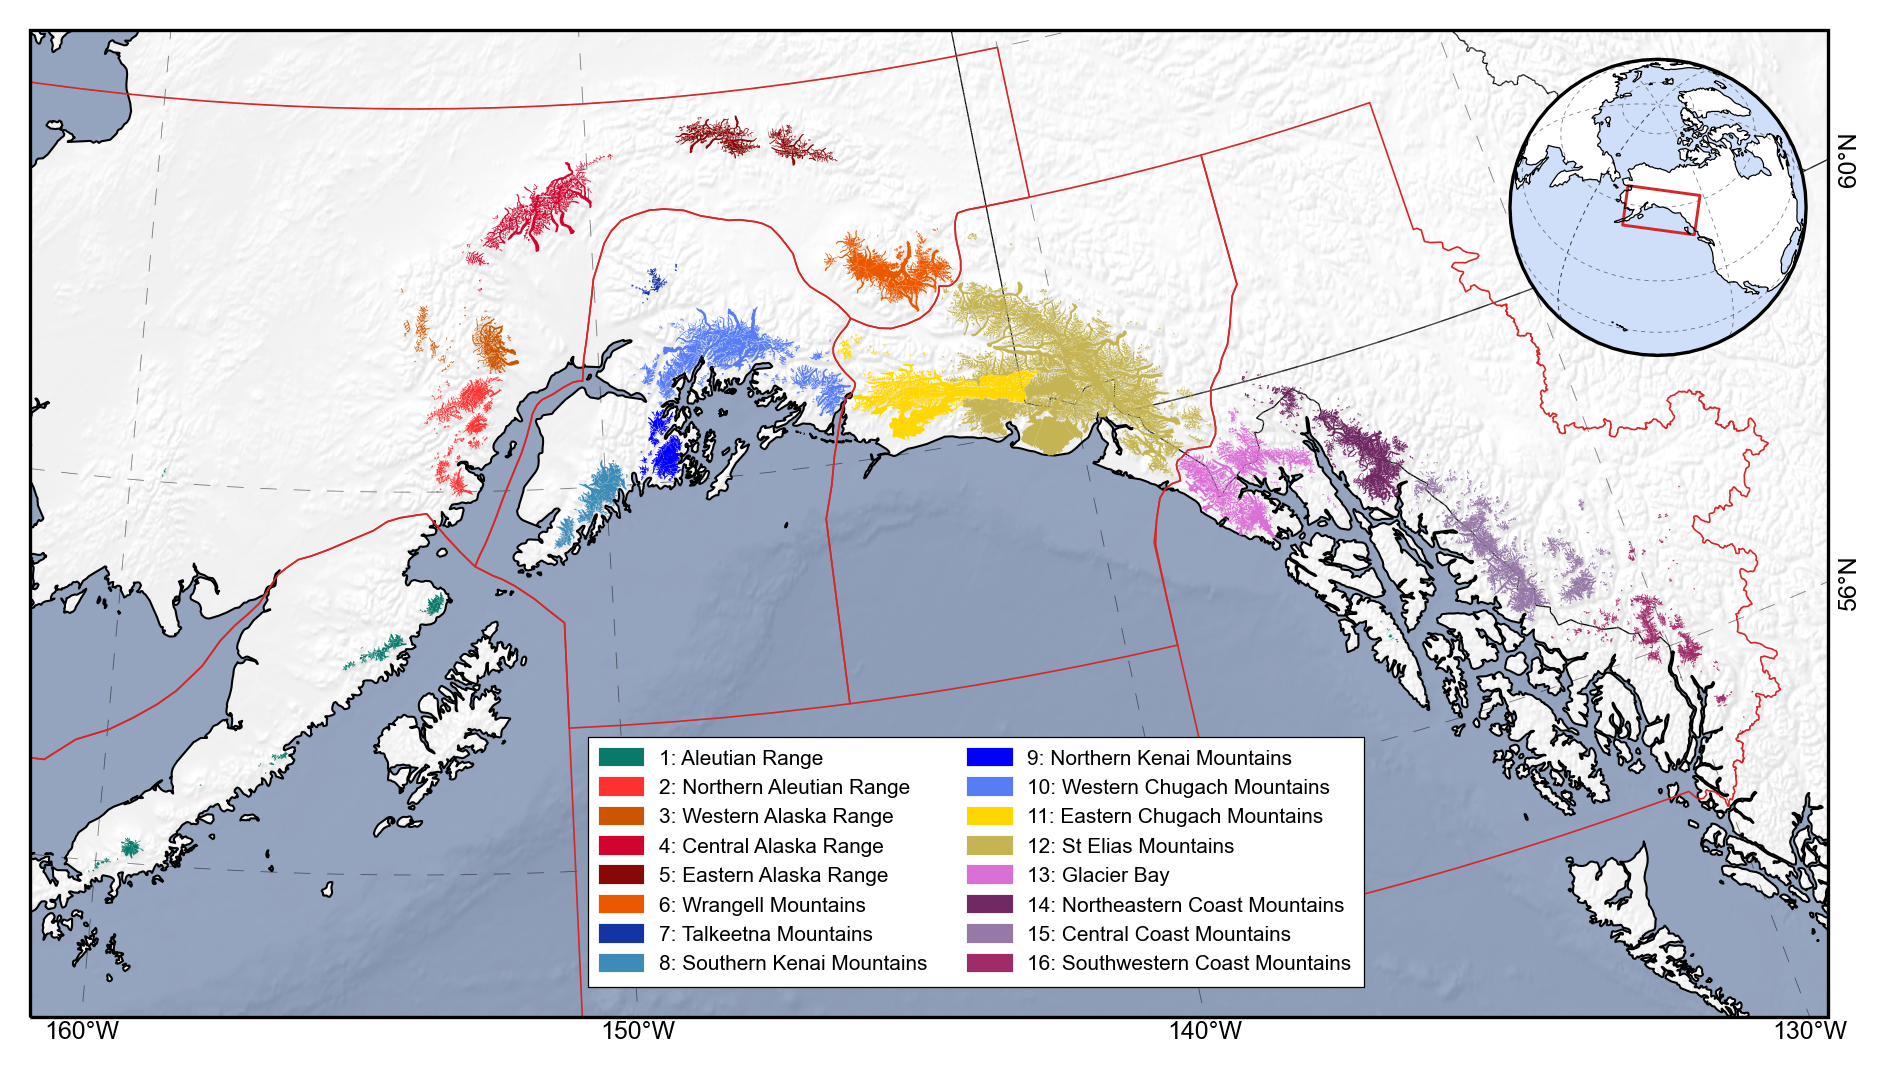

In [40]:
# define alaska albers projection
albers = ccrs.epsg(3338)


### Craft the figure
mpl.rcParams['font.family'] = 'Arial'
mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Arial'

# initiate
fig,axs = snowFun.create_base_map(hillshade=1, projection=albers)

# remove axis labels
axs.set_xticks([])
axs.set_yticks([])
axs.set_xlabel("")
axs.set_ylabel("")

# add lat/lon gridlines
gl = axs.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
              linestyle=(5,(20,20)), linewidth=0.2, color='0', alpha=0.5, xpadding=1)

# gridline edits
gl.top_labels=False
gl.left_labels=False
gl.xlabel_style = {'size':6, 'rotation':'horizontal', 'ha':'center'}
gl.ylabel_style = {'size':6, 'rotation':'vertical', 'ha':'center'}
gl.xlocator = mticker.FixedLocator([-160, -150, -140, -130])
gl.ylocator = mticker.FixedLocator([64, 60, 56])

# plot glaciers
all_data_gdf.plot(ax=axs, column='O3Region', cmap=cmap_16, vmin=1, vmax=16, zorder=10, legend=False,
                  legend_kwds={"location":'bottom', "fraction":0.02, 'pad':-0.15, "label":'O3Region'})

# plot o2region borders
o2_gdf.plot(ax=axs, facecolor='none', edgecolor='tab:red', linewidth=0.4, zorder=3)

# create legend
legend_elements = []
for idx,row in o3_info_df.iterrows():
    legend_elements.append( Patch(facecolor=row['Color'], edgecolor=row['Color'],
                                  label=f"{row['Number']}: {row['Name']}")
                          )
    
# place legend 
l = axs.legend(handles=legend_elements,
           ncols=2, fontsize=5, fancybox=False,
           framealpha=1, edgecolor='black', shadow=False,
           borderpad=0.6,
           loc='lower center', bbox_to_anchor=(0.523,0.020))

# legend border width
l.get_frame().set_linewidth(0.3)

### add inset axis for global context
inset_proj = ccrs.NearsidePerspective(central_longitude=-145, central_latitude=60, satellite_height=10000000) #35800000
ax_inset = axs.inset_axes( (0.75,0.67,0.3,0.3), transform=axs.transAxes,
                          projection=inset_proj)

# plot coastlines, ocean
ax_inset.add_feature(ctp.feature.OCEAN, facecolor='cornflowerblue', alpha=0.3)
ax_inset.coastlines(linewidth=0.3, zorder=2)

# add grid
glin = ax_inset.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
              linestyle=(5,(5,5)), linewidth=0.2, color='0', alpha=0.5, zorder=1)

# add box of the main map extent
bbox = box(minx=-450000, miny=500000, maxx=1661000, maxy=1652000)
ax_inset.add_geometries( bbox, crs=albers, facecolor="none", edgecolor="tab:red", linewidth=0.7)

# set axis outer box to be the top layer
for k, spine in axs.spines.items():
    spine.set_zorder(10)

# save
out_path = os.path.join(folder_AGVA, 'Figures', 'study area', 'study_area.png')
plt.savefig(out_path, dpi=400, bbox_inches='tight', pad_inches=0.015)
